In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [2]:
df_hw = pd.read_csv("C:/Users/htc/Downloads/height_weight.csv")

In [3]:
df_hw.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


# Normality ( If data gaussian or not?)

In [4]:
height = df_hw['Height']

<Axes: xlabel='Height', ylabel='Count'>

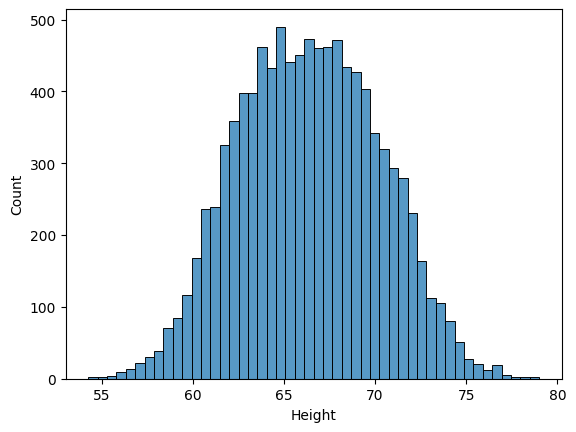

In [5]:
sns.histplot(height)

 It looks Gaussian.
 But there's always a chance that despite being Bell shaped, even though it must appeared bell shaped for us just by visually looking at it. It's not very convincing

## QQ PLOT

In [6]:
from statsmodels.graphics.gofplots import qqplot

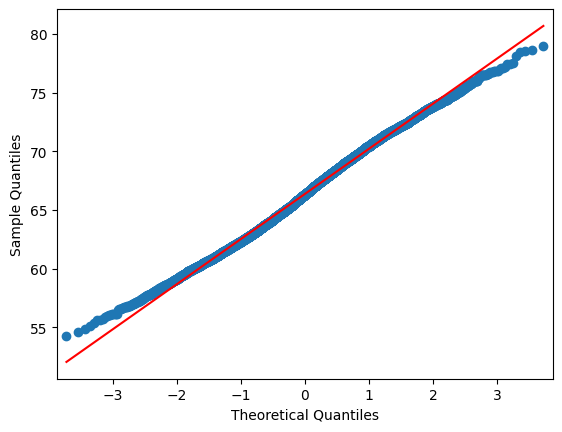

In [10]:
qqplot(height,line = 's')
plt.show()

Very close to line. So this proves that the data we have closely mimics to Gaussian.
But it is just a visualisation not a statistics test.

# Shapiro test and Kolmogrov smirnoff test

In [11]:
height_subset = height.sample(100)

In [12]:
# Shapiro test
# H0: Data is Gaussian
# Ha: Data is not Gaussian

from scipy.stats import shapiro,kstest

In [13]:
t_stat,p_value = shapiro(height_subset)
print(p_value)
if p_value < 0.05:
    print('Reject H0')
    print('Data is not Gaussian')
else:
    print('Fail to Reject H0')
    print('Data is Gaussian')

0.5027645230293274
Fail to Reject H0
Data is Gaussian


In [14]:
# KS test
# H0: Data is Gaussian
# Ha: Data is not Gaussian 

In [17]:
t_stat,p_value = kstest(height_subset,norm.cdf,args=(height_subset.mean(),height_subset.std()))
print(p_value)
if p_value < 0.05:
    print('Reject H0')
    print('Data is not Gaussian')
else:
    print('Fail to Reject H0')
    print('Data is Gaussian')

0.9030484944870952
Fail to Reject H0
Data is Gaussian


# Testing Variance

<Axes: xlabel='Height', ylabel='Count'>

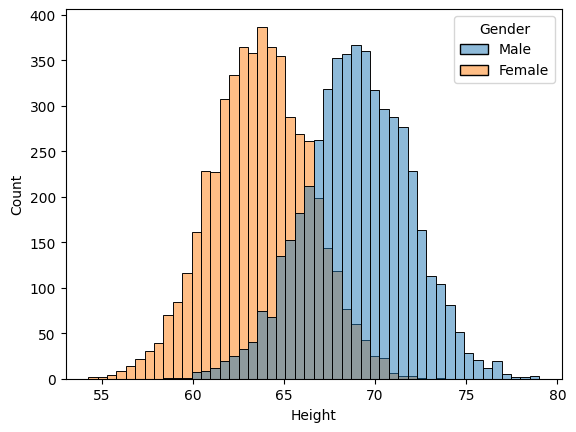

In [18]:
sns.histplot(data = df_hw, x='Height', hue = 'Gender')

In [19]:
# So here height of men are slightly higher than  the women.
# So is this little difference statistically significant or just by chance?

In [22]:
height_men = df_hw.loc[df_hw['Gender']=='Male'][['Height']]
height_men.mean()

Height    69.026346
dtype: float64

In [23]:
height_women = df_hw.loc[df_hw['Gender']=='Female'][['Height']]
height_women.mean()

Height    63.708774
dtype: float64

In [29]:
# Is this difference statistically significant or just by chance?
# H0: Same avg.height
# Ha: Differneces in height

In [30]:
from scipy.stats import ttest_ind

In [31]:
t_stat,p_value = ttest_ind(height_men,height_women,alternative = 'greater')
print(p_value)
if p_value < 0.05:
    print('Reject H0')
    print('Data is not Gaussian')
else:
    print('Fail to Reject H0')
    print('Data is Gaussian')print(p_value)


[0.]
Reject H0
Differences in Heights


In [32]:
# Testing Variances

In [33]:
height_men.var()

Height    8.198843
dtype: float64

In [35]:
height_women.var()

Height    7.269947
dtype: float64

In [37]:
from scipy.stats import levene

# H0: Both have same variance
# Ha: The variance is different

In [44]:
t_stat,p_value = levene(height_men['Height'],height_women['Height'])

In [47]:
print(p_value)
if p_value < 0.05:
    print('Reject H0')
    print('Difference in variance')
else:
    print('Fail to Reject H0')
    print('same variance')

0.0004586349895436178
Reject H0
Difference in variance
